## Creating CNN Using Scratch And Transfer Learning

Please download the dataset from the below url:

https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria/download?datasetVersionNumber=1

In [1]:
# Import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [3]:
# re-size all the images to this
IMAGE_SIZE = [244, 244]

train_path = 'cell_images/Train'
valid_path = 'cell_images/Test'

In [4]:
# Import the vgg 19 library as show below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weight

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [6]:
# useful for getting number of output classes
folders = glob('Dataset/Train/*')

In [7]:
folders

['Dataset/Train\\Parasite', 'Dataset/Train\\Uninfected']

In [8]:
# our layers - you can add more if you want\
x = Flatten()(vgg19.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 244, 244, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 244, 244, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 244, 244, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 122, 122, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 122, 122, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 122, 122, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 61, 61, 128)       0     

In [11]:
from tensorflow.keras.layers import MaxPooling2D

In [12]:
### Create Model from scretch usinf CNN
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding="same", activation="relu", input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500, activation="relu"))
model.add(Dense(2, activation="softmax"))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [13]:
# tell the model what cost and optimization method to use
model.compile(
loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy']
)

In [14]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [16]:
training_set

In [17]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [18]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\satya\AppData\Local\Temp\ipykernel_8600\4102162479.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
13/13 [==============================] - 26s 2s/step - loss: 2.1062 - accuracy: 0.4952 - val_loss: 0.6818 - val_accuracy: 0.6567
Epoch 2/50
13/13 [==============================] - 23s 2s/step - loss: 0.6861 - accuracy: 0.5913 - val_loss: 0.6659 - val_accuracy: 0.6343
Epoch 3/50
13/13 [==============================] - 24s 2s/step - loss: 0.6342 - accuracy: 0.6154 - val_loss: 0.8189 - val_accuracy: 0.3806
Epoch 4/50
13/13 [==============================] - 24s 2s/step - loss: 0.5958 - accuracy: 0.6442 - val_loss: 0.7398 - val_accuracy: 0.4478
Epoch 5/50
13/13 [==============================] - 25s 2s/step - loss: 0.5144 - accuracy: 0.7284 - val_loss: 0.9352 - val_accuracy: 0.4104
Epoch 6/50
13/13 [==============================] - 25s 2s/step - loss: 0.4917 - accuracy: 0.7620 - val_loss: 0.7200 - val_accuracy: 0.5746
Epoch 7/50
13/13 [==============================] - 27s 2s/step - loss: 0.5661 - accuracy: 0.7043 - val_loss: 0.9218 - val_accuracy: 0.3582
Epoch 8/50
13/13 [==

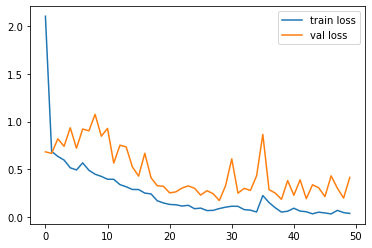

<Figure size 432x288 with 0 Axes>

In [19]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

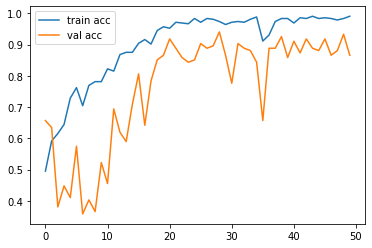

<Figure size 432x288 with 0 Axes>

In [20]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [21]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [22]:
y_pred = model.predict(test_set)

5/5 [==============================] - 1s 132ms/step


In [23]:
y_pred

array([[9.9972838e-01, 2.7162165e-04],
       [9.9996614e-01, 3.3840337e-05],
       [9.9880052e-01, 1.1994622e-03],
       [2.3665899e-02, 9.7633410e-01],
       [9.9999976e-01, 1.8369502e-07],
       [1.0000000e+00, 6.2413487e-14],
       [2.6087976e-01, 7.3912030e-01],
       [9.9161911e-01, 8.3808657e-03],
       [9.9999821e-01, 1.8245694e-06],
       [9.7605848e-01, 2.3941480e-02],
       [9.9446762e-01, 5.5323276e-03],
       [9.8084183e-03, 9.9019158e-01],
       [9.9809963e-01, 1.9003520e-03],
       [4.0604245e-02, 9.5939571e-01],
       [4.5792907e-03, 9.9542063e-01],
       [2.7940664e-02, 9.7205937e-01],
       [4.3394491e-01, 5.6605506e-01],
       [1.2325113e-02, 9.8767483e-01],
       [9.9999321e-01, 6.8189020e-06],
       [2.9516563e-02, 9.7048336e-01],
       [9.9999905e-01, 9.1166925e-07],
       [9.7212251e-03, 9.9027878e-01],
       [9.9877769e-01, 1.2223475e-03],
       [9.2778963e-01, 7.2210431e-02],
       [9.9862683e-01, 1.3732251e-03],
       [9.9999976e-01, 2.

In [24]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [25]:
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1], dtype=int64)

In [26]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [27]:
model=load_model('model_vgg19.h5')

In [28]:
img=image.load_img('Dataset/Test/Uninfected/2.png', target_size=(224, 224))

In [29]:
x= image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [30]:
x.shape

(224, 224, 3)

In [31]:
x=x/255

In [32]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [33]:
model.predict(img_data)

1/1 [==============================] - 0s 258ms/step


array([[1., 0.]], dtype=float32)

In [34]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 40ms/step


In [35]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected
